## **Customer Segmentation Project**
"Customer segmentation simply means grouping your customers according to various characteristics (for example grouping customers by age). It’s a way for organizations to understand their customers. Knowing the differences between customer groups, it’s easier to make strategic decisions regarding product growth and marketing".
**Source:** https://neptune.ai/blog/customer-segmentation-using-machine-learning

**Objective:** 
In this project, I will be segmenting customers base on behavioral and possibly geographical to enable management better target customers and maximize sales.

### **Outline:**

1.   Importing Necessary Libraries
2.   Loading Data...
3.   Data Exploration
4.   Data Cleaning and Feature engineering
5.   Behavioral Customer Segmentation Using RFM
6.   Data Preprocessing
7.   Clustering
8.   Profiling 
10.  Conclusion





### **Importing Necessary Libraries**

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

import datetime
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


NumExpr defaulting to 2 threads.


### **Loading Data...**

In [2]:
customer_data = pd.read_csv('data.csv', parse_dates = ['InvoiceDate'], encoding= 'latin1')
print('Total number of customer records: {}'.format(len(customer_data)))
print('Total rows and columns: {}'.format(customer_data.shape))

Total number of customer records: 541909
Total rows and columns: (541909, 8)


### **Data Exploration** 

In [3]:
customer_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The output above shows that the customer data contains datetime64(1), float64(2), int64(1), and object(4) columns.


**Checking the Data for Missing Values**

In [5]:
customer_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are two variables containing missing values (Description and CustomerID). I will be dropping all missing values

In [6]:
customer_data = customer_data.dropna()   #all missing values dropped

In [7]:
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now the customer data contains no missing values

**Splitting the Data into Numerical and Categorical for Easy Cleaning**

In [8]:
numerical = customer_data.select_dtypes(include= np.number)
categorical = customer_data.select_dtypes(include = 'object')

In [9]:
numerical.head()

Quantity  UnitPrice  CustomerID
0         6       2.55     17850.0
1         6       3.39     17850.0
2         8       2.75     17850.0
3         6       3.39     17850.0
4         6       3.39     17850.0

In [10]:
categorical.head()

InvoiceNo StockCode                          Description         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
1    536365     71053                  WHITE METAL LANTERN  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  United Kingdom

**Defining a Function to Explore Numerical Variables**

In [11]:
def num_explorer(df, x):
    """
    Displays a summary of the variable (column, x) including a description of the variable, whether there are missing 
    values in the variable(column), number of duplicates and boxplot/distplot of the column.
    
    INPUT:
    Name of dataframe, variable(column) name.
    
    OUTPUT: 
    Returns the summary as defined above
    
    """

    print('Summary Statistics: \n')
    print('*'*70)
    print(df[x].apply([len, min, max, np.median, np.mean, np.std]))
    print('*'*70)
    print('Missing Values: {}'.format(df[x].isna().sum()))
    print('*'*70)
    print('Duplicate Values: {}'.format(df[x].duplicated().sum()))
    print('*'*70)
    #plotting a boxplot to check for outliers
    plt.rcParams['figure.figsize'] = (18, 8)
    
    plt.subplot(1,2,1)
    sns.set(style = 'darkgrid')
    plt.boxplot(df[x],vert=True, )
    plt.title('Boxplot of {}'.format(df[x].name), fontsize = 12)
    plt.xlabel(df[x].name)
    plt.ylabel('Count')
    
    
    plt.subplot(1,2,2)
    sns.set(style = 'whitegrid')
    sns.distplot(df[x])
    plt.title('Distribution of {}'.format(df[x].name), fontsize = 12)
    plt.xlabel(df[x].name)
    plt.ylabel('Count')
    plt.show()

Summary Statistics: 

**********************************************************************
len       406829.000000
min       -80995.000000
max        80995.000000
median         5.000000
mean          12.061303
std          248.693370
Name: Quantity, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 406393
**********************************************************************


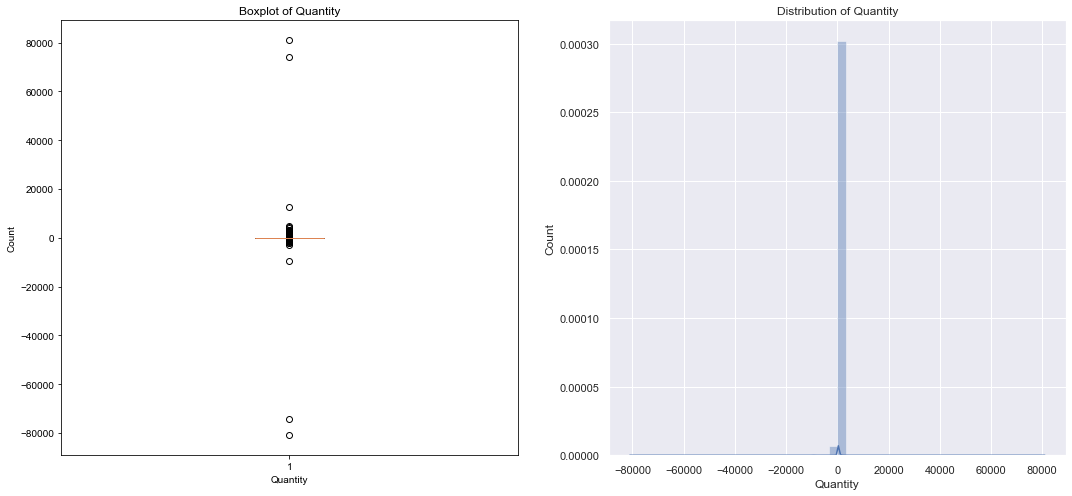

In [12]:
num_explorer(customer_data, 'Quantity')

The output above shows a summary of the Quantity column and it very skewed.

Summary Statistics: 

**********************************************************************
len       406829.000000
min            0.000000
max        38970.000000
median         1.950000
mean           3.460471
std           69.315162
Name: UnitPrice, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 406209
**********************************************************************


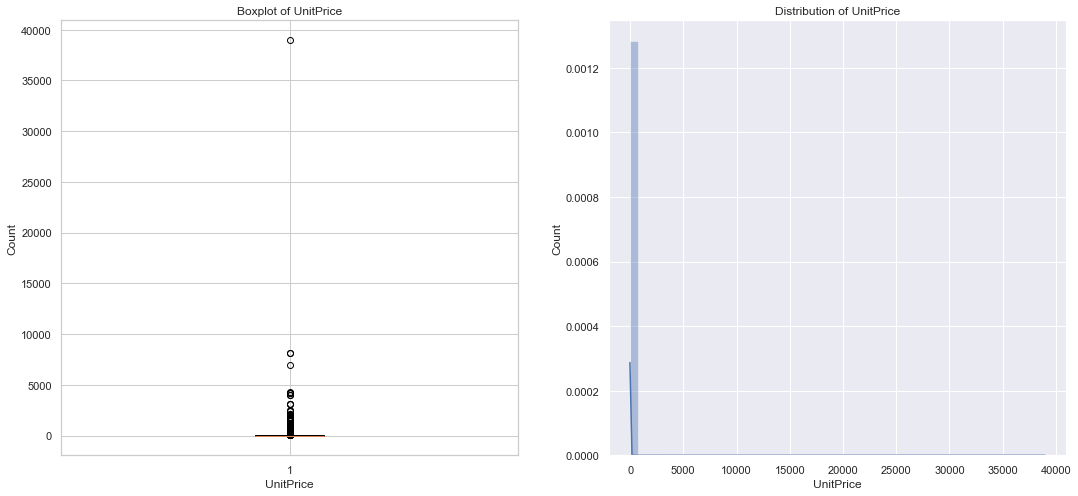

In [13]:
num_explorer(customer_data, 'UnitPrice')

The UnitPrice column too is very skewed

Summary Statistics: 

**********************************************************************
len       406829.000000
min        12346.000000
max        18287.000000
median     15152.000000
mean       15287.690570
std         1713.600303
Name: CustomerID, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 402457
**********************************************************************


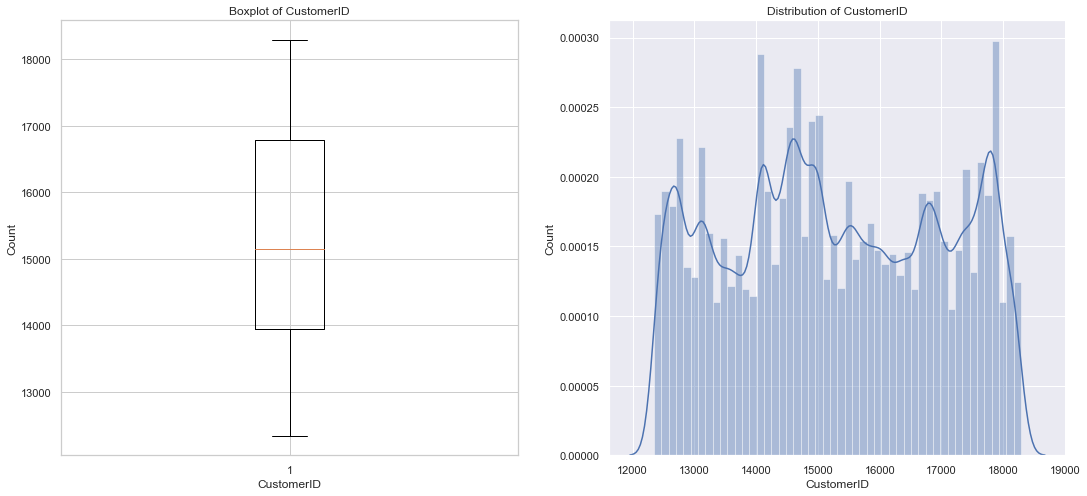

In [14]:
num_explorer(customer_data, 'CustomerID')

The customerID column looks normally distributed

In [15]:
categorical.describe()

InvoiceNo StockCode                         Description         Country
count     406829    406829                              406829          406829
unique     22190      3684                                3896              37
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq         542      2077                                2070          361878

In [16]:
#dropping redundant variables
categorical.drop(['StockCode', 'Description'], axis = 1, inplace = True) #these 2 columns would not be used in this analysis,
                                                                         #hence has been dropped. 

**Alternatively**,
using the automatic EDA technique to explore the data.

100%|##########| 1/1 [00:00<?, ?it/s]

  0%|          | 0/283 [00:00<?, ?it/s]


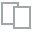
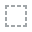
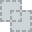
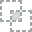
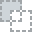
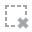
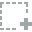
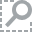
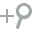
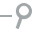
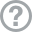
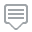
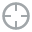
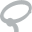
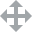
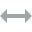
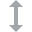
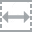
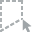
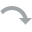
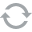
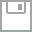
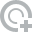
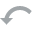
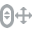
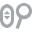
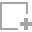
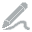
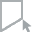
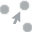
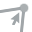
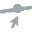

In [17]:
plot(customer_data)

**Dealing with Outliers (Negative Values)**

As shown in the explorations above, the Quantity and UnitPrice contain negative values which could signal cancelled purchase, hence these negative values would be dropped.

In [18]:
customer_data = customer_data[customer_data['Quantity']>0]
customer_data = customer_data[customer_data['UnitPrice']>0]

### **Behavioral Customer Segmentation Using RFM**

Recency, Frequency and MoneyValue (RFM) analysis is a type of customer segmentation that uses the purchasing behaviour of customers such as amount spent, the frequency with which a customer shops, number of visits per year among others to segment customers in order to know loyal customers and other interesting insights.

R-Recency measures how long it takes a customer to return to the business after the last visit. The lower the recency value, the better for the business.

F-Frequency measures the intensity of a customer's relationship with the business. The higher the frequency, the better for the business.

M-Monetary Value measures the total spending of the customer per each visit to the business. The higher the monetary value, the better for the business.

In [19]:
# calcuting unit sales in order to get MonetaryValue(TotalPurchase) .
customer_data['UnitSales'] = customer_data['UnitPrice'] * customer_data['Quantity']


In [20]:
#cheking for the date of first and last customer transactions for this dataset
print('Min:{}; Max:{}'.format(min(customer_data['InvoiceDate']),
                              max(customer_data['InvoiceDate'])))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [21]:
#creating a hypothetical snapshot day to help calculate the recency of customer transactions
hypothetical_date = max(customer_data['InvoiceDate']) + datetime.timedelta(days = 1)


Customer_RMF = customer_data.groupby(['CustomerID']).agg({'InvoiceDate':lambda x:(hypothetical_date - x.max()).days,
                                                'InvoiceNo':'count',
                                                 'UnitSales':'sum'})

In [22]:
Customer_RMF

InvoiceDate  InvoiceNo  UnitSales
CustomerID                                   
12346.0             326          1   77183.60
12347.0               2        182    4310.00
12348.0              75         31    1797.24
12349.0              19         73    1757.55
12350.0             310         17     334.40
...                 ...        ...        ...
18280.0             278         10     180.60
18281.0             181          7      80.82
18282.0               8         12     178.05
18283.0               4        756    2094.88
18287.0              43         70    1837.28

[4338 rows x 3 columns]

In [23]:
Customer_RMF.columns

Index(['InvoiceDate', 'InvoiceNo', 'UnitSales'], dtype='object')

In [24]:
# Rename the columns
Customer_RMF.rename( columns={'InvoiceDate':'Recency',
                               'InvoiceNo':'Frequency',
                            'UnitSales':'MonetaryValue'},inplace = True)

In [25]:
Customer_RMF

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          1       77183.60
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
...             ...        ...            ...
18280.0         278         10         180.60
18281.0         181          7          80.82
18282.0           8         12         178.05
18283.0           4        756        2094.88
18287.0          43         70        1837.28

[4338 rows x 3 columns]

## Data Preprocessing

Summary Statistics: 

**********************************************************************
len       4338.000000
min          1.000000
max        374.000000
median      51.000000
mean        92.536422
std        100.014169
Name: Recency, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 3989
**********************************************************************


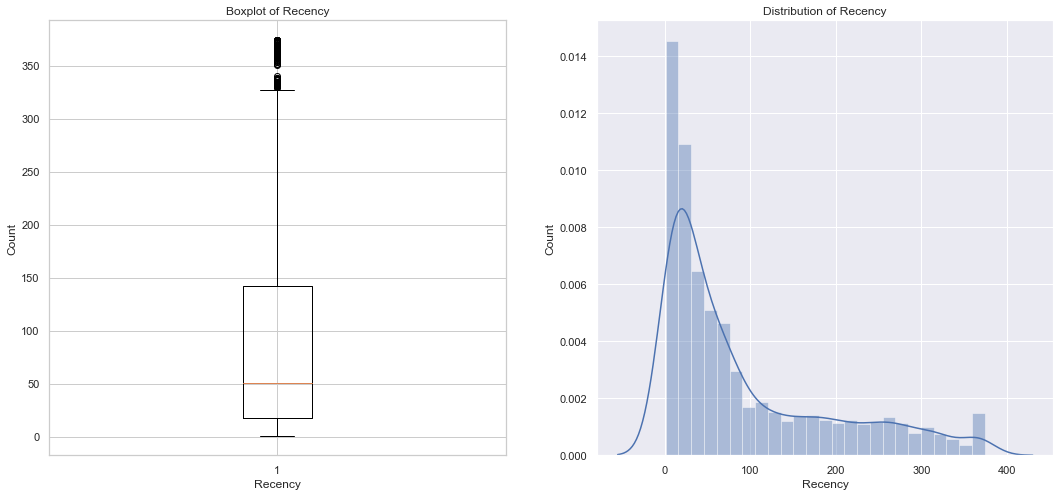

In [26]:
#exploring the new columns
num_explorer(Customer_RMF, 'Recency')

The output shows that the Recency column is skewed to the left.

Summary Statistics: 

**********************************************************************
len       4338.000000
min          1.000000
max       7847.000000
median      41.000000
mean        91.720609
std        228.785094
Name: Frequency, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 3878
**********************************************************************


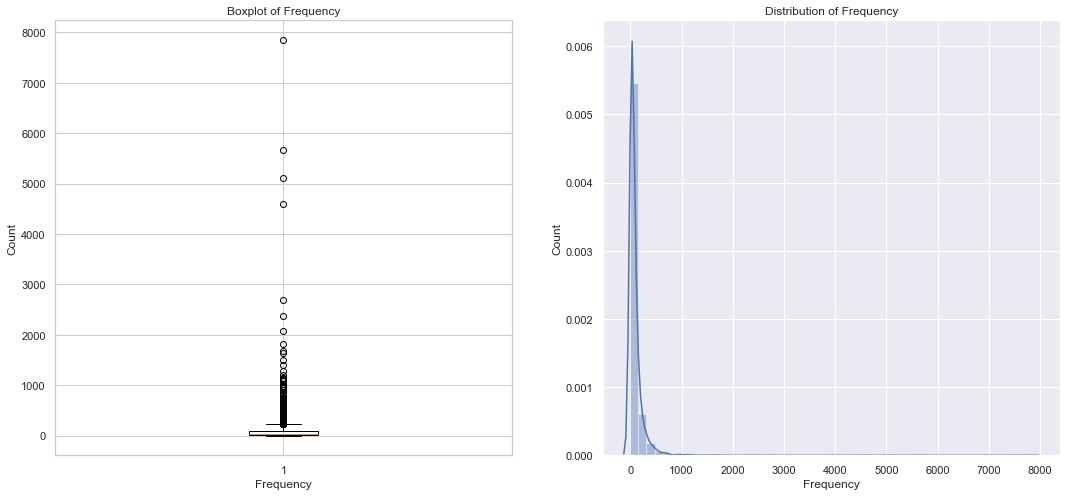

In [27]:
num_explorer(Customer_RMF, 'Frequency')

The Frequency column is also heavily skewed to the left.

Summary Statistics: 

**********************************************************************
len         4338.000000
min            3.750000
max       280206.020000
median       674.485000
mean        2054.266460
std         8989.230441
Name: MonetaryValue, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 54
**********************************************************************


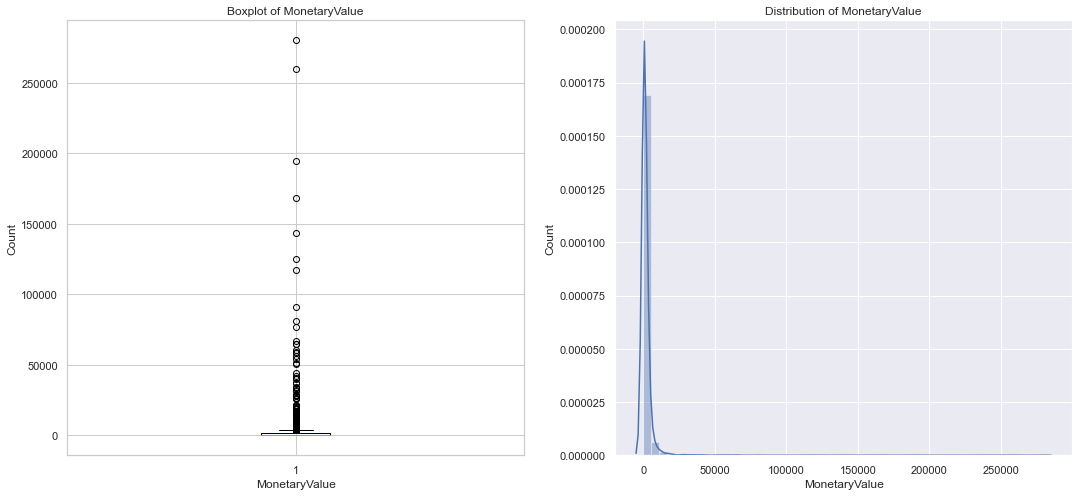

In [28]:
num_explorer(Customer_RMF, 'MonetaryValue')

The MonetaryValue column is also heavily skewed to the left.

### Transforming the RFM Columns to Unskew Them Using Log

I will be using KMeans clustering for this segmentation and it works best when the data is normally distributed. Hence I will use the Numpy log function to change the columns to normal distributions.

In [29]:
Customer_RMF['Recency_lg']= np.log(Customer_RMF['Recency'])
Customer_RMF['Frequency_lg']= np.log(Customer_RMF['Frequency'])
Customer_RMF['MonetaryValue_lg']= np.log(Customer_RMF['MonetaryValue'])

Summary Statistics: 

**********************************************************************
len       4338.000000
min          0.000000
max          5.924256
median       3.931826
mean         3.767534
std          1.432445
Name: Recency_lg, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 3989
**********************************************************************


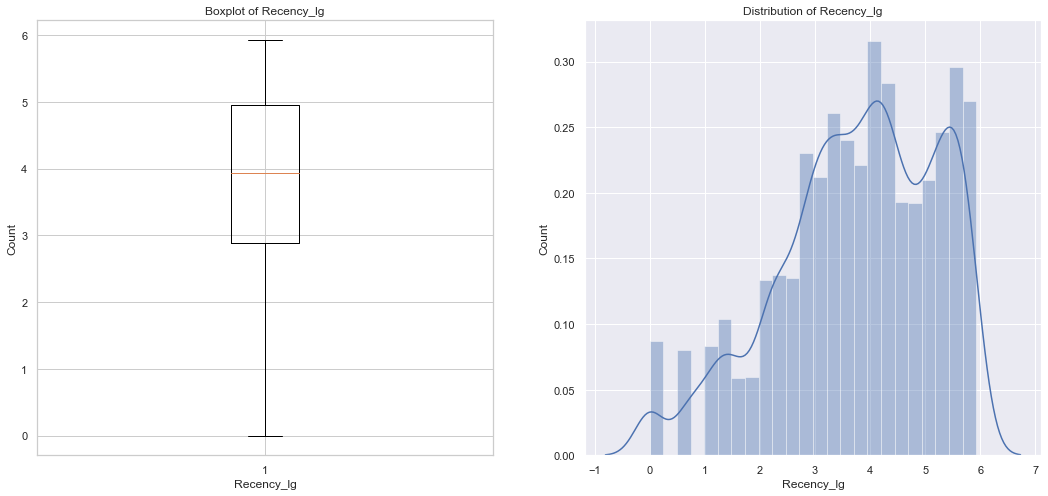

In [30]:
num_explorer(Customer_RMF, 'Recency_lg')

This is now normally distributed and can be used for clustering

Summary Statistics: 

**********************************************************************
len       4338.000000
min          0.000000
max          8.967887
median       3.713572
mean         3.679750
std          1.326113
Name: Frequency_lg, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 3878
**********************************************************************


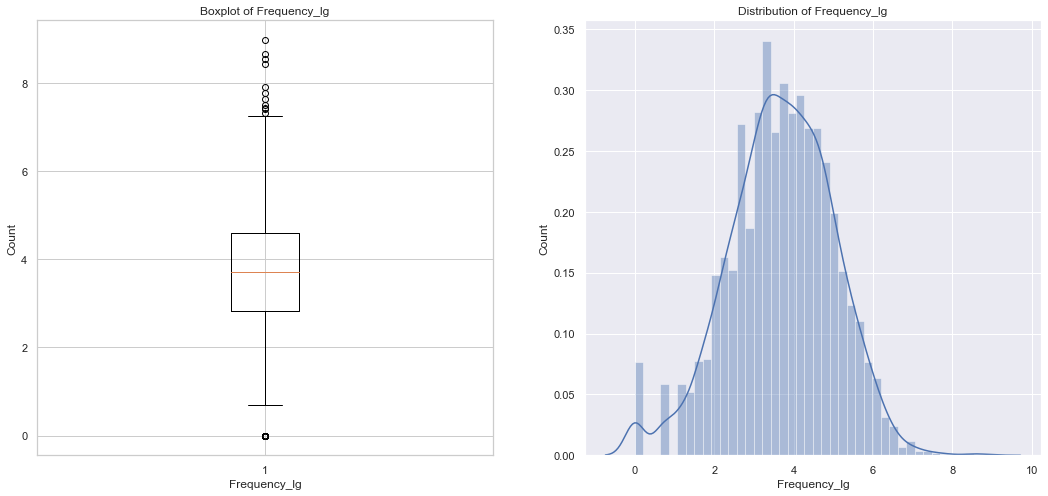

In [31]:
num_explorer(Customer_RMF, 'Frequency_lg')

Summary Statistics: 

**********************************************************************
len       4338.000000
min          1.321756
max         12.543280
median       6.513949
mean         6.590782
std          1.260895
Name: MonetaryValue_lg, dtype: float64
**********************************************************************
Missing Values: 0
**********************************************************************
Duplicate Values: 92
**********************************************************************


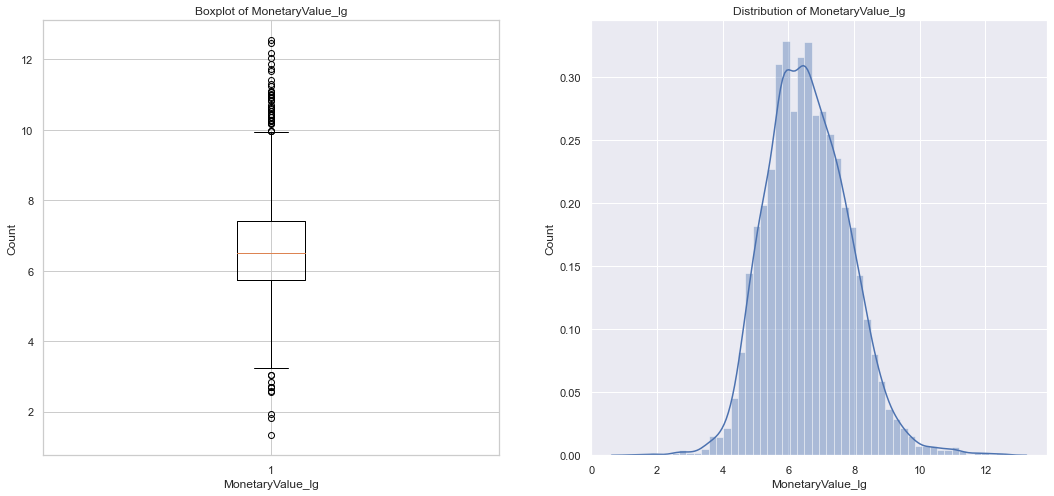

In [32]:
num_explorer(Customer_RMF, 'MonetaryValue_lg')

### Scaling the Data

This helps to center the data and scale it because K-means clustering works better when scaled. 

In [33]:
#Extracting the logged columns from Customer_RMF for scaling
Customer_RMF1 = Customer_RMF[['Recency_lg', 'Frequency_lg', 'MonetaryValue_lg']]

In [34]:
Customer_RMF1.describe().round(1)

Recency_lg  Frequency_lg  MonetaryValue_lg
count      4338.0        4338.0            4338.0
mean          3.8           3.7               6.6
std           1.4           1.3               1.3
min           0.0           0.0               1.3
25%           2.9           2.8               5.7
50%           3.9           3.7               6.5
75%           5.0           4.6               7.4
max           5.9           9.0              12.5

In [35]:
#scaling the data
scaler = StandardScaler()
scaler.fit(Customer_RMF1)
scaled_Customer_RMF1 = scaler.transform(Customer_RMF1)

In [36]:
#scaled_Customer_RMF1 is now a numpy array

print(scaled_Customer_RMF1.mean(axis=0).round(2))
print(scaled_Customer_RMF1.std(axis=0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


### Clustering Using KMeans 

This is done using the elbow method. I will plot a graph, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric (inertia)

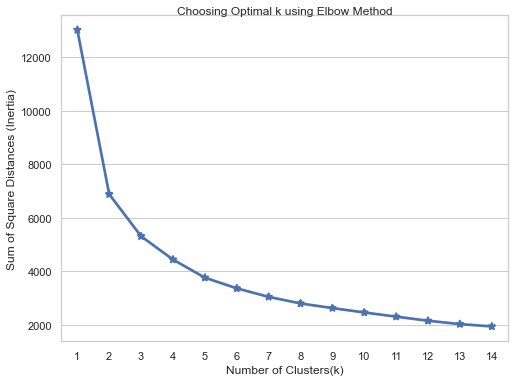

In [37]:
SSE = {}  #Sum of square distance (error)
for k in range(1, 15):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    kmeans = kmeans.fit(scaled_Customer_RMF1)
    SSE[k] = kmeans.inertia_
    
#Plotting the graph for the sum of square distance(error) values and Number of Clusters (k)
sns.set_style('whitegrid')
plt.figure(figsize  = (8,6))
sns.pointplot(x = list(SSE.keys()), y = list(SSE.values()), markers = '*')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances (Inertia)')
plt.title('Choosing Optimal k using Elbow Method',pad = 0.8)
plt.show()

The plot above shows the optimal cluster (k) at the point where the decrease in the SSE(Inertia) begin to slow and become constant. This makes k= 3 or 4 the optimal clusters.

### Final Clustering with k=3

In [38]:
kmeans3 = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000,random_state = 3)
kmeans3 = kmeans3.fit(scaled_Customer_RMF1)
print(kmeans3)

#Find the clusters for the observation given in the dataset
Customer_RMF['Clusters'] = kmeans3.labels_
Customer_RMF.head()

KMeans(max_iter=1000, n_clusters=3, random_state=3)


Recency  Frequency  MonetaryValue  Recency_lg  Frequency_lg  \
CustomerID                                                                
12346.0         326          1       77183.60    5.786897      0.000000   
12347.0           2        182        4310.00    0.693147      5.204007   
12348.0          75         31        1797.24    4.317488      3.433987   
12349.0          19         73        1757.55    2.944439      4.290459   
12350.0         310         17         334.40    5.736572      2.833213   

            MonetaryValue_lg  Clusters  
CustomerID                              
12346.0            11.253942         1  
12347.0             8.368693         0  
12348.0             7.494007         1  
12349.0             7.471676         1  
12350.0             5.812338         2

In [39]:
Customer_RMF['Clusters'].value_counts()

1    1861
2    1521
0     956
Name: Clusters, dtype: int64

Basically, this shows that customers of the mall can be grouped into three segments, with majority falling into segment 1, 
followed by segment 2 and finally segment 0.

### Visualizing the Clusters

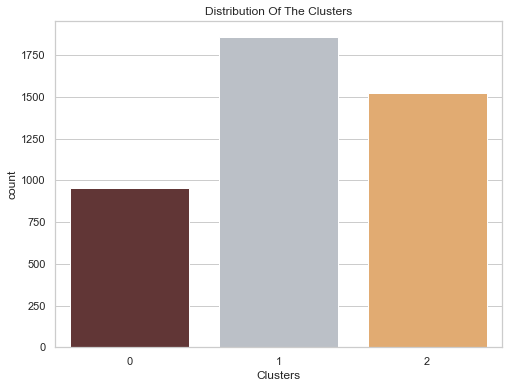

In [40]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#F3AB60"]
plt.figure(figsize  = (8,6))
pl = sns.countplot(Customer_RMF['Clusters'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

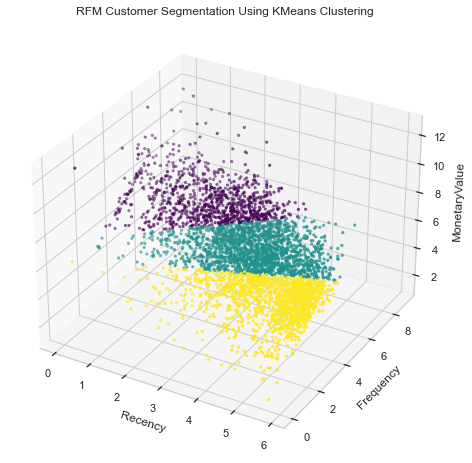

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=Customer_RMF.Recency_lg
ys=Customer_RMF.Frequency_lg
zs=Customer_RMF.MonetaryValue_lg
ax.scatter(xs,ys,zs,s=5, c=Customer_RMF['Clusters'], cmap = 'viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue') 
ax.set_title('RFM Customer Segmentation Using KMeans Clustering')
plt.show()

From the 3D plot above, customers in the top category (colored as purple) can be classified as the most loyal customers of the mall. Since they have higher Frequency and more Recency, and they tend to spend more too based on
the increasing trend in Monetary value. Likewise, the customer category in the middle (colored as green) can be said to be the regular customers of the mall since they have high Recency and Frequency, but they do not spend much since their Monetary value is decreasing in trend. Finally, the last category(colored as yellow) can be seen as the not so loyal customers because their Recency and Frequency values are both low and they also tend not to spend much indicating lower Monetary value.

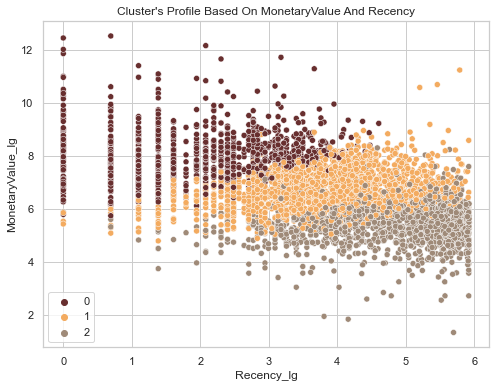

In [42]:
pal2 = ['#682F2F','#F3AB60', '#9F8A78'] 
sns.set_style('whitegrid')
plt.figure(figsize  = (8,6))
pl = sns.scatterplot(data = Customer_RMF,x=Customer_RMF["Recency_lg"], y=Customer_RMF["MonetaryValue_lg"],
                     hue=Customer_RMF["Clusters"], palette= pal2)
pl.set_title("Cluster's Profile Based On MonetaryValue And Recency")
plt.legend()
plt.show()

From the plot, customers in cluster 0 turn to spend more and their recency is higher, customers in cluster 1 do not spend so much and their recency is low and finally those in cluster 2 have lower spending trend and lower recency.  

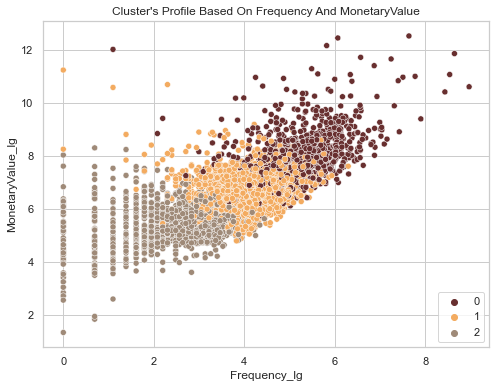

In [43]:
pal2 = ['#682F2F','#F3AB60', '#9F8A78']
sns.set_style('whitegrid')
plt.figure(figsize  = (8,6))
pl = sns.scatterplot(data = Customer_RMF,x=Customer_RMF["Frequency_lg"], y=Customer_RMF["MonetaryValue_lg"],
                     hue=Customer_RMF["Clusters"], palette= pal2)
pl.set_title("Cluster's Profile Based On Frequency And MonetaryValue")
plt.legend()
plt.show()

From the plot, customers in cluster 0 turn to spend more and their frequency is higher too, customers in cluster 1 do not spend so much but they have high frequency and finally those in cluster 2 have low spending trend and low frequency.  

End! Thank you.